## Loading the standard libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [2]:
data = pd.read_csv('Twitter_Sentiment_Data.csv', encoding = 'cp1252', names = ['target', 'id', 'Date', 'flag', 'user', 'text'])
data.head()

,target,id,Date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
data.shape

(1600000, 6)

## Observations:

1. There are 16 lakh rows in the data
2. The data contains 6 columns

In [4]:
data = data.drop(['id', 'Date', 'flag'], axis = 1)
data.head()

,target,user,text
0,0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,scotthamilton,is upset that he can't update his Facebook by ...
2,0,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,ElleCTF,my whole body feels itchy and like its on fire
4,0,Karoli,"@nationwideclass no, it's not behaving at all...."


## Rearrange the data columns

In [5]:
data = data[['user', 'text', 'target']]
data.head()

,user,text,target
0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,scotthamilton,is upset that he can't update his Facebook by ...,0
2,mattycus,@Kenichan I dived many times for the ball. Man...,0
3,ElleCTF,my whole body feels itchy and like its on fire,0
4,Karoli,"@nationwideclass no, it's not behaving at all....",0


#### Target column analysis

In [6]:
data['target'].unique()

array([0, 4], dtype=int64)

### Observations:
- 0 represents negative emotion tweet
- 4 represents positive emotion tweet
- Replace all 4 with 1.

In [7]:
data['target'] = data['target'].replace(4, 1)
data.head()

,user,text,target
0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,scotthamilton,is upset that he can't update his Facebook by ...,0
2,mattycus,@Kenichan I dived many times for the ball. Man...,0
3,ElleCTF,my whole body feels itchy and like its on fire,0
4,Karoli,"@nationwideclass no, it's not behaving at all....",0


In [8]:
data['target'].unique()

array([0, 1], dtype=int64)

In [9]:
## 0 represents a negative emotion tweet
## 1 represents a positive emotion tweet

#### Check total count of postive tweets and total count of negative tweets

In [10]:
data['target'].value_counts()

0    800000
1    800000
Name: target, dtype: int64

In [11]:
## Check the percentage of positive emotion tweets and negative emotion tweets

data['target'].value_counts(normalize = True) * 100

0    50.0
1    50.0
Name: target, dtype: float64

### Observations:

- 50% of the total data is postive emotion tweets
- 50% of the total data is negative emotion tweets

<Axes: xlabel='target', ylabel='count'>

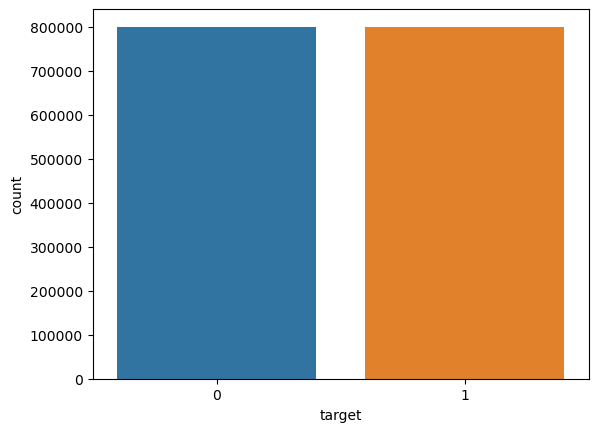

In [12]:
sns.countplot(x = data['target'])

## Missing value analysis

In [13]:
data.isnull().sum()

user      0
text      0
target    0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   user    1600000 non-null  object
 1   text    1600000 non-null  object
 2   target  1600000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 36.6+ MB


## If I want to continue further analysis, I am reducing the size of the data. The reason is the system will get hanged with 16 lakh rows

In [15]:
### Seperate negative and positive tweets

df_pos = data[data['target'] == 1]
df_neg = data[data['target'] == 0]

In [16]:
df_pos.shape

(800000, 3)

In [17]:
df_neg.shape

(800000, 3)

### Taking only 1/4th of the data to execute on machine smoothly

In [18]:
df_pos = df_pos.iloc[:int(50000)]
df_neg = df_neg.iloc[:int(50000)]

In [19]:
df_pos.shape

(50000, 3)

In [20]:
df_neg.shape

(50000, 3)

### Join df_pos and df_neg to get the data

In [21]:
data = pd.concat([df_pos, df_neg])
data.head()

,user,text,target
800000,ersle,I LOVE @Health4UandPets u guys r the best!!,1
800001,becca210,im meeting up with one of my besties tonight! ...,1
800002,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,katarinka,Being sick can be really cheap when it hurts t...,1
800004,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,1


In [22]:
data.shape

(100000, 3)

In [23]:
data['target'].value_counts()

1    50000
0    50000
Name: target, dtype: int64

### Data Preprocessing on text column

In [24]:
data['text']

800000         I LOVE @Health4UandPets u guys r the best!! 
800001    im meeting up with one of my besties tonight! ...
800002    @DaRealSunisaKim Thanks for the Twitter add, S...
800003    Being sick can be really cheap when it hurts t...
800004      @LovesBrooklyn2 he has that effect on everyone 
                                ...                        
49995     @mileycyrus so i have the same insomnia prob a...
49996     20 mintues late for my meeting starting @ 8  h...
49997     @kentucky_derby super excited! Are you tweetin...
49998     I WANT ANOTHER DAY OFF!!!!  To much Sh#t to do...
49999                  i just jacked up this umbrella cake 
Name: text, Length: 100000, dtype: object

### Since the text column is Natural language data hence apply NLP techniques on this column

##### Step 1 : Convert all upper case text to lower case  text

In [25]:
data['text'] = data['text'].str.lower()
data.head()

,user,text,target
800000,ersle,i love @health4uandpets u guys r the best!!,1
800001,becca210,im meeting up with one of my besties tonight! ...,1
800002,Wingman29,"@darealsunisakim thanks for the twitter add, s...",1
800003,katarinka,being sick can be really cheap when it hurts t...,1
800004,_EmilyYoung,@lovesbrooklyn2 he has that effect on everyone,1


In [26]:
data.tail()

,user,text,target
49995,Jessica_567,@mileycyrus so i have the same insomnia prob a...,0
49996,whouwit077,20 mintues late for my meeting starting @ 8 h...,0
49997,AmyPR,@kentucky_derby super excited! are you tweetin...,0
49998,cynthia_sue03,i want another day off!!!! to much sh#t to do...,0
49999,msceo8,i just jacked up this umbrella cake,0


#### Step 2 : To remove all the punctuations

In [ ]:
##import string
## print(string.punctuation)

In [27]:
import string
eng_punct = string.punctuation
eng_punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
df = pd.DataFrame({'name' : ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
                  'age' : [20, 30, 40, 50, 60, 25, 35, 45]})
df

In [ ]:
df['name'] = df['name'].apply(lambda x : x.lower())
df

In [ ]:
## Multiply each and every row of age column by 2

def by_2(x):
    return x * 2

df['age'] = df['age'].apply(by_2)
df

In [28]:
def remove_punc(text):
    translator = str.maketrans('', '', eng_punct)
    return text.translate(translator)

In [35]:
sent1 = '@this is very, interesting #learning!'
sent1

'@this is very, interesting #learning!'

In [ ]:
# sent1 = remove_punc(sent1)
# sent1

In [ ]:
#data['text'] = data['text'].apply(lambda x : remove_punc(x))
#data.head()

In [ ]:
data.tail()

### Removing stop words from the text column

In [29]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

def remove_stopwords(text):
    

In [36]:
sent1

'@this is very, interesting #learning!'

## Aproach
1. Get all the words from the sent1
2. Create a empty list
3. Use for loop to extract each word from step 1
4. Compare each word with stop words list
5. append only useful words to the empty list created at step 2
6. Apply join method on the list obtained fom step 5

In [37]:
sent1.split()

['@this', 'is', 'very,', 'interesting', '#learning!']

In [38]:
for word in sent1.split():
    print(word)

@this
is
very,
interesting
#learning!


In [39]:
for  word in sent1.split():
    if word not in stop_words:
        print(word)

@this
very,
interesting
#learning!


In [40]:
words = []
for  word in sent1.split():
    if word not in stop_words:
        words.append(word)
        
print(words)
        
sent1 = " ".join(words)
sent1

['@this', 'very,', 'interesting', '#learning!']


'@this very, interesting #learning!'

In [41]:
sent1 = '@this is very, interesting #learning!'
sent1 = remove_punc(sent1)
sent1 = " ".join([word for word in sent1.split() if word not in stop_words])
sent1

'interesting learning'

### Apply remove_stopwords function to the tweeter data

In [42]:
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

data['text'] = data['text'].apply(remove_stopwords)
data.head()

,user,text,target
800000,ersle,love @health4uandpets u guys r best!!,1
800001,becca210,im meeting one besties tonight! cant wait!! - ...,1
800002,Wingman29,"@darealsunisakim thanks twitter add, sunisa! g...",1
800003,katarinka,sick really cheap hurts much eat real food plu...,1
800004,_EmilyYoung,@lovesbrooklyn2 effect everyone,1


In [43]:
data.tail()

,user,text,target
49995,Jessica_567,@mileycyrus insomnia prob slept 3 hrs woke 5am...,0
49996,whouwit077,20 mintues late meeting starting @ 8 how'd kno...,0
49997,AmyPR,@kentucky_derby super excited! tweeting event ...,0
49998,cynthia_sue03,want another day off!!!! much sh#t today. got ...,0
49999,msceo8,jacked umbrella cake,0


### Step 2 is stops words removal

In [44]:
data.tail()

,user,text,target
49995,Jessica_567,@mileycyrus insomnia prob slept 3 hrs woke 5am...,0
49996,whouwit077,20 mintues late meeting starting @ 8 how'd kno...,0
49997,AmyPR,@kentucky_derby super excited! tweeting event ...,0
49998,cynthia_sue03,want another day off!!!! much sh#t today. got ...,0
49999,msceo8,jacked umbrella cake,0


In [45]:
data['text'] = data['text'].apply(lambda x : remove_stopwords(x))
data.head()

,user,text,target
800000,ersle,love @health4uandpets u guys r best!!,1
800001,becca210,im meeting one besties tonight! cant wait!! - ...,1
800002,Wingman29,"@darealsunisakim thanks twitter add, sunisa! g...",1
800003,katarinka,sick really cheap hurts much eat real food plu...,1
800004,_EmilyYoung,@lovesbrooklyn2 effect everyone,1


In [46]:
data.tail()

,user,text,target
49995,Jessica_567,@mileycyrus insomnia prob slept 3 hrs woke 5am...,0
49996,whouwit077,20 mintues late meeting starting @ 8 how'd kno...,0
49997,AmyPR,@kentucky_derby super excited! tweeting event ...,0
49998,cynthia_sue03,want another day off!!!! much sh#t today. got ...,0
49999,msceo8,jacked umbrella cake,0


### Step 3 : Remove all the digits from the text column

In [47]:
data.tail(15)

,user,text,target
49985,HiNay,work. beautiful outside...crisp sunny! wish ou...,0
49986,policymonk,dishwasher broke. repairman came &quot;fixed&q...,0
49987,tanyalee619,going head work get paperwork done-i've got pa...,0
49988,bitterstudent,"done laundry, writing essay. money, credit, ci...",0
49989,kturner92,"let's buy hawaii, money, baby....still car, st...",0
49990,Hersheys07,says goodness __ sorry n tlga.. (tears) :'-( (...,0
49991,Pandora_dsi,another diminishing supply mornings totally wa...,0
49992,henleyt1,happy came work 3 hours early,0
49993,j_navarra,mmmmmmmmmhangover. slept training ride,0
49994,henleyt1,@thisismyiq early,0


In [48]:
import re
def remove_nums(text):
    return re.sub('[0-9]+', "", text)

data['text'] = data['text'].apply(lambda x : remove_nums(x))

In [49]:
data.tail(15)

,user,text,target
49985,HiNay,work. beautiful outside...crisp sunny! wish ou...,0
49986,policymonk,dishwasher broke. repairman came &quot;fixed&q...,0
49987,tanyalee619,going head work get paperwork done-i've got pa...,0
49988,bitterstudent,"done laundry, writing essay. money, credit, ci...",0
49989,kturner92,"let's buy hawaii, money, baby....still car, st...",0
49990,Hersheys07,says goodness __ sorry n tlga.. (tears) :'-( (...,0
49991,Pandora_dsi,another diminishing supply mornings totally wa...,0
49992,henleyt1,happy came work hours early,0
49993,j_navarra,mmmmmmmmmhangover. slept training ride,0
49994,henleyt1,@thisismyiq early,0


### Remove all the URL's from the text column

In [50]:
data.tail(25)

,user,text,target
49975,chloe_tiarne,bored one take,0
49976,maximicide,"sooo tired, work -... sure beautiful day love xx",0
49977,joshcoop,need take tylenol,0
49978,rosemaryhelen,can't bend right foot big toe ever since mikey...,0
49979,metro_cub,"home work. settling down, checking e-mail, get...",0
49980,minxkitty,bored now! want outside sun,0
49981,mcspicy,@shondarhimes pls dont kill violet...she alrea...,0
49982,okoyas,everyone using twitter? complicated,0
49983,ivanomar,ahh working day night,0
49984,karrren,"@tkofthewildboyz back home, missing fun. that'...",0


In [51]:
def remove_url(text):
    return re.sub('((www.[^s]+) | (https?://[^s]+))', '', text)

data['text'] = data['text'].apply(lambda x : remove_url(x))

In [52]:
data.tail(25)

,user,text,target
49975,chloe_tiarne,bored one take,0
49976,maximicide,"sooo tired, work -... sure beautiful day love xx",0
49977,joshcoop,need take tylenol,0
49978,rosemaryhelen,can't bend right foot big toe ever since mikey...,0
49979,metro_cub,"home work. settling down, checking e-mail, get...",0
49980,minxkitty,bored now! want outside sun,0
49981,mcspicy,@shondarhimes pls dont kill violet...she alrea...,0
49982,okoyas,everyone using twitter? complicated,0
49983,ivanomar,ahh working day night,0
49984,karrren,"@tkofthewildboyz back home, missing fun. that'...",0


## Clean and Remove repeating words adjacent to each other

In [53]:
sent1 = "How are are you"
sent2 = "Edpresso is the the the the best platform to learn"
sent3 = "programming fun is fun always"

In [54]:
import re
regex = r'\b(\w+)(?:\W+\1\b)+'    #### using the re identify the repeated words in a sentence

In [55]:
re.sub(regex, r'\1', sent1, flags = re.IGNORECASE)

'How are you'

In [56]:
re.sub(regex, r'\1', sent2, flags = re.IGNORECASE)

'Edpresso is the best platform to learn'

In [57]:
re.sub(regex, r'\1', sent3, flags = re.IGNORECASE)

'programming fun is fun always'

In [58]:
## to apply the cleaning and removal of the repeating character we deine a function

def cleaning_dup_words(text):
    return re.sub(regex, r'\1', text)

data['text'] = data['text'].apply(lambda x : cleaning_dup_words(x))
data.tail()

,user,text,target
49995,Jessica_567,@mileycyrus insomnia prob slept hrs woke am n...,0
49996,whouwit077,mintues late meeting starting @ how'd know g...,0
49997,AmyPR,@kentucky_derby super excited! tweeting event ...,0
49998,cynthia_sue03,want another day off!!!! much sh#t today. got ...,0
49999,msceo8,jacked umbrella cake,0


## remove punctuations

In [59]:
import string
eng_punc = string.punctuation
eng_punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
def remove_punctuations(text):
    translator = str.maketrans('', '', eng_punc)
    return text.translate(translator)

In [61]:
data['text'] = data['text'].apply(lambda x : remove_punctuations(x))
data.tail()

,user,text,target
49995,Jessica_567,mileycyrus insomnia prob slept hrs woke am nd...,0
49996,whouwit077,mintues late meeting starting howd know goi...,0
49997,AmyPR,kentuckyderby super excited tweeting event hap...,0
49998,cynthia_sue03,want another day off much sht today got quotne...,0
49999,msceo8,jacked umbrella cake,0


### Stemming : getting the root words without meanings

In [62]:
from nltk.stem import PorterStemmer
pst = PorterStemmer()
pst

<PorterStemmer>

In [63]:
def stemming_on_text(data):
    text = [pst.stem(data) for word in data]
    return data

data['text'] = data['text'].apply(lambda x : stemming_on_text(x))
data

,user,text,target
800000,ersle,love healthuandpets u guys r best,1
800001,becca210,im meeting one besties tonight cant wait girl...,1
800002,Wingman29,darealsunisakim thanks twitter add sunisa got ...,1
800003,katarinka,sick really cheap hurts much eat real food plu...,1
800004,_EmilyYoung,lovesbrooklyn effect everyone,1
...,...,...,...
49995,Jessica_567,mileycyrus insomnia prob slept hrs woke am nd...,0
49996,whouwit077,mintues late meeting starting howd know goi...,0
49997,AmyPR,kentuckyderby super excited tweeting event hap...,0
49998,cynthia_sue03,want another day off much sht today got quotne...,0


## Apply Lemmatization

In [64]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [65]:
def lemmatizer_on_text(data):
    text = [wnl.lemmatize(word) for word in data]
    return data

data['text'] = data['text'].apply(lambda x : lemmatizer_on_text(x))
data

,user,text,target
800000,ersle,love healthuandpets u guys r best,1
800001,becca210,im meeting one besties tonight cant wait girl...,1
800002,Wingman29,darealsunisakim thanks twitter add sunisa got ...,1
800003,katarinka,sick really cheap hurts much eat real food plu...,1
800004,_EmilyYoung,lovesbrooklyn effect everyone,1
...,...,...,...
49995,Jessica_567,mileycyrus insomnia prob slept hrs woke am nd...,0
49996,whouwit077,mintues late meeting starting howd know goi...,0
49997,AmyPR,kentuckyderby super excited tweeting event hap...,0
49998,cynthia_sue03,want another day off much sht today got quotne...,0


## Seperate X and y

In [66]:
X = data.drop('target', axis = 1)
y = data['target']

## Divide the data into train test split

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [71]:
X_train = X_train.drop('user', axis = 1)
X_train

,text
842865,ceo switching tweetdeck using twhirl
41446,omg am hot damn were blistering summer this ma...
16374,twitter followers
29106,cant excited missing everyone
813404,nileylovestory yea true bigger person amp let ...
...,...
821243,got wee caramel sundae mcdsthese r yummy cheer...
845891,lgladdy thank kind words well keep updated mp ...
842613,going pick swayswaybaby time spidey action gym...
843567,mileycyrus tell perezhilton truth chickedy


In [74]:
X_test = X_test.drop('user', axis = 1)
X_test

,text
803582,mileycyrus friends hour get line gma today say...
10498,zoo hopefully going tonight though
3227,justagirl thats great license wish got rest back
821333,sun friend makes feel almost normal yay
803885,yes manechyou stink fishget
...,...
36308,nite everyone tai wouldnt say bye msn cries go...
848870,obamas policy called fascist economic socialis...
834940,metsgal normal hehe
821964,kimboleigh lmfao get make yaself


## Apply Vectorization on the text column

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv

CountVectorizer()

In [76]:
cv.fit(X_train['text'])

CountVectorizer()

In [78]:
X_train = cv.transform(X_train['text'])
X_test = cv.transform(X_test['text'])

In [80]:
pd.DataFrame(X_train.toarray(), columns = cv.get_feature_names_out())

MemoryError: Unable to allocate 39.0 GiB for an array with shape (70000, 74794) and data type int64

In [81]:
X_train

<70000x74794 sparse matrix of type '<class 'numpy.int64'>'
	with 523840 stored elements in Compressed Sparse Row format>

## Apply Logistic Regression on X_train and y_train

In [82]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [83]:
lr.fit(X_train, y_train)

LogisticRegression()

## Perform prediction on the X_test data

In [85]:
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

## Perform Evaluation

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7550333333333333

## Apply Naive Bayes on NLP data

- Note: On NLP data, usually, NaiveBayes Classifier algorithm is preferred.
- It does not mean you cannot apply other Classification algorithms

In [87]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb

BernoulliNB()

In [88]:
bnb.fit(X_train, y_train)

BernoulliNB()

In [90]:
y_pred_bnb = bnb.predict(X_test)
y_pred_bnb

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_bnb)

0.7477333333333334